In [ ]:
import numpy as np
from keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rc('font', family = 'NanumBarunGothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

In [ ]:
 # colab 한글폰트 설치하기
 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# [4월 5일]
---

## # 로이터 데이터셋
---

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(train_data)

2121728/2110848 [==============================] - 0s 0us/step
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186,

In [ ]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


In [ ]:
# 텍스트로 디코딩

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_newswire

565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### # 데이터 인코딩



In [ ]:
# 훈련 데이터를 벡터로 변환

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 테스트 데이터를 벡터로 변환
# 원-핫 인코딩 (= 범주형 인코딩)

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


# 케라스 내장함수 이용
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### # 모델 구성
---

In [ ]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# 모델 컴파일
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### # 훈련 검증
---

In [ ]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 23ms/step - loss: 2.6469 - accuracy: 0.5435 - val_loss: 1.7278 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4180 - accuracy: 0.7110 - val_loss: 1.2968 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0472 - accuracy: 0.7745 - val_loss: 1.1225 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8164 - accuracy: 0.8261 - val_loss: 1.0203 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6442 - accuracy: 0.8644 - val_loss: 0.9542 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5167 - accuracy: 0.8910 - val_loss: 0.9251 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4174 - accuracy: 0.9127 - val_loss: 0.9036 - val_accuracy: 0.8110
Epoch 8/20
16

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


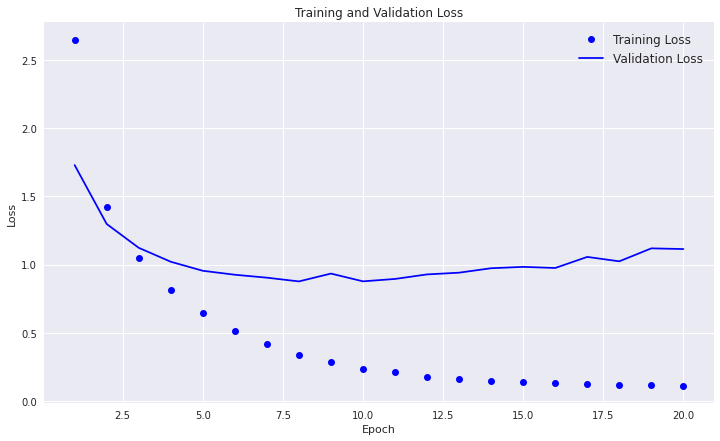

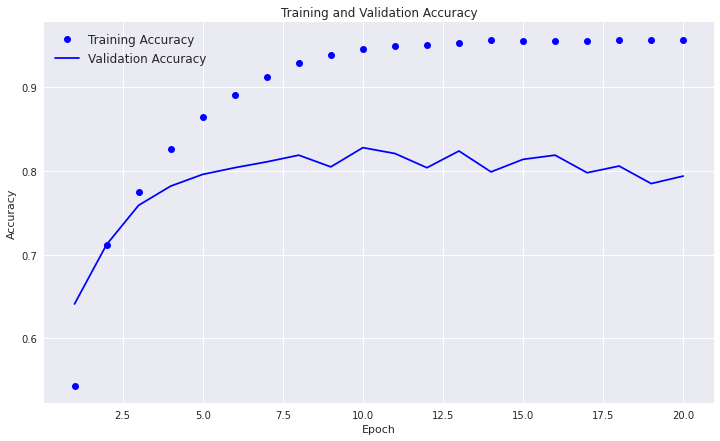

In [ ]:
# 검증 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

for i, j, k in zip(['Loss', 'Accuracy'], [loss, acc], [val_loss, val_acc]):
    plt.figure(figsize = (12, 7))
    plt.plot(epochs, j, 'bo', label = f'Training {i}')
    plt.plot(epochs, k, 'b', label = f'Validation {i}')
    plt.title(f'Training and Validation {i}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{i}')
    plt.legend(fontsize = 12)
    plt.show()

### # 모델을 다시 훈련한 뒤 테스트 데이터로 평가
---

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print('\n', results)

Epoch 1/9
16/16 [==============================] - 1s 21ms/step - loss: 2.5884 - accuracy: 0.5203 - val_loss: 1.7660 - val_accuracy: 0.6180
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 1.4731 - accuracy: 0.6894 - val_loss: 1.3444 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0885 - accuracy: 0.7623 - val_loss: 1.1778 - val_accuracy: 0.7220
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8531 - accuracy: 0.8172 - val_loss: 1.0374 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6808 - accuracy: 0.8612 - val_loss: 0.9709 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.5430 - accuracy: 0.8890 - val_loss: 0.9254 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4365 - accuracy: 0.9092 - val_loss: 0.9085 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

In [ ]:
# 무작위로 분류한 데이터의 정확도 확인

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

# 약 18퍼센트의 일치율을 보인다
float(np.sum(hits_array)) / len(test_labels)

0.1834372217275156

### # 새로운 데이터 예측하기
---

In [ ]:
predictions = model.predict(x_test)

# 각 항목의 길이가 46인 벡터
print(predictions.shape, '\n')

# 각 벡터의 원소의 합은 1 (확률 분포)
print(np.sum(predictions[0]), '\n')

# 가장 큰 값(가장 확률이 높은)이 예측 클래스
print(np.round(predictions[0], 3), '\n')
print(np.argmax(predictions[0]))

(2246, 46) 

1.0000001 

[0.    0.    0.    0.891 0.102 0.    0.    0.    0.003 0.    0.    0.001
 0.    0.    0.    0.    0.    0.    0.    0.001 0.002 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ] 

3


### # 레이블과 손실을 다루는 다른 방법
---

In [ ]:
# 정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# 정수 텐서에는 'sparse_categorical_crossentropy' 손실함수를 사용
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

### # 충분히 큰 중간층을 두어야 하는 이유
---
- 정확도 최고 값이 약 10% 감소
- 많은 정보를 중간층의 저차원 표현공간으로 압축하려고 했기 때문


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

model.fit(partial_x_train, partial_y_train,
          epochs = 20,
          batch_size = 128,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)
print('\n', results)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 3.0424 - acc: 0.3014 - val_loss: 2.3489 - val_acc: 0.5070
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9231 - acc: 0.5512 - val_loss: 1.7725 - val_acc: 0.5570
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5763 - acc: 0.5769 - val_loss: 1.6340 - val_acc: 0.5710
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.4168 - acc: 0.6016 - val_loss: 1.5686 - val_acc: 0.5870
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2820 - acc: 0.6458 - val_loss: 1.4821 - val_acc: 0.6360
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1362 - acc: 0.7175 - val_loss: 1.4216 - val_acc: 0.6820
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0102 - acc: 0.7512 - val_loss: 1.3868 - val_acc: 0.6960
Epoch 8/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9197 - acc: 0.77

# [4월 6일]
---

### # 층과 유닛을 변경
---
- 32개 유닛, 128개 유닛
- 3개의 은닉 층

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 3.0429 - accuracy: 0.3812 - val_loss: 2.3974 - val_accuracy: 0.5660
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.9828 - accuracy: 0.6383 - val_loss: 1.7174 - val_accuracy: 0.6620
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4339 - accuracy: 0.7159 - val_loss: 1.4083 - val_accuracy: 0.6880
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1570 - accuracy: 0.7581 - val_loss: 1.2541 - val_accuracy: 0.7270
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.9809 - accuracy: 0.7922 - val_loss: 1.1625 - val_accuracy: 0.7500
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8498 - accuracy: 0.8192 - val_loss: 1.0949 - val_accuracy: 0.7610
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7416 - accuracy: 0.8399 - val_loss: 1.0532 - val_accuracy: 0.7720
Epoch 8/20
16

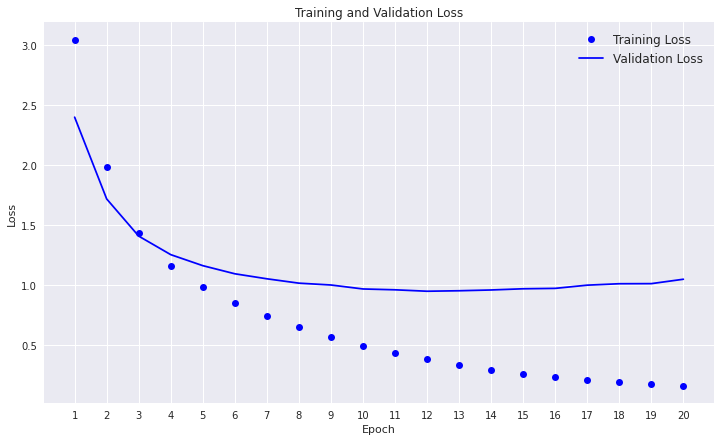

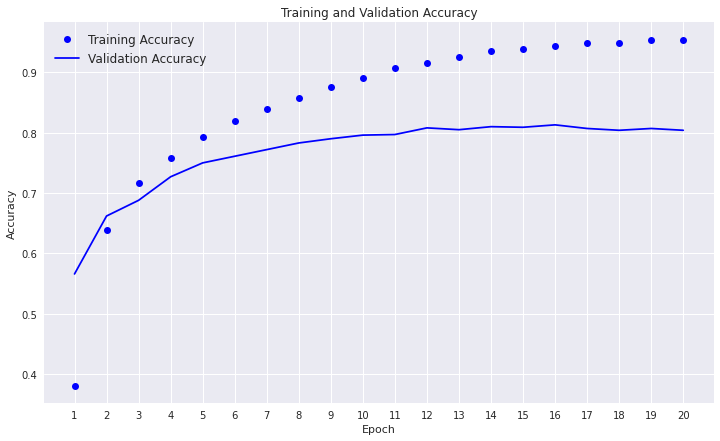

In [ ]:
# 32개 유닛

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)
print('\n', results)


loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

for i, j, k in zip(['Loss', 'Accuracy'], [loss, acc], [val_loss, val_acc]):
    plt.figure(figsize = (12, 7))
    plt.plot(epochs, j, 'bo', label = f'Training {i}')
    plt.plot(epochs, k, 'b', label = f'Validation {i}')
    plt.title(f'Training and Validation {i}')
    plt.xlabel('Epoch')
    plt.xticks(epochs)
    plt.ylabel(f'{i}')
    plt.legend(fontsize = 12)
    plt.show()

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 2.1681 - accuracy: 0.5613 - val_loss: 1.3578 - val_accuracy: 0.6880
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0909 - accuracy: 0.7646 - val_loss: 1.0750 - val_accuracy: 0.7830
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7589 - accuracy: 0.8374 - val_loss: 1.0600 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5497 - accuracy: 0.8840 - val_loss: 0.9001 - val_accuracy: 0.8060
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4056 - accuracy: 0.9156 - val_loss: 0.8506 - val_accuracy: 0.8190
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.3090 - accuracy: 0.9366 - val_loss: 0.8554 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.2471 - accuracy: 0.9435 - val_loss: 0.8836 - val_accuracy: 0.8160
Epoch 8/20
16

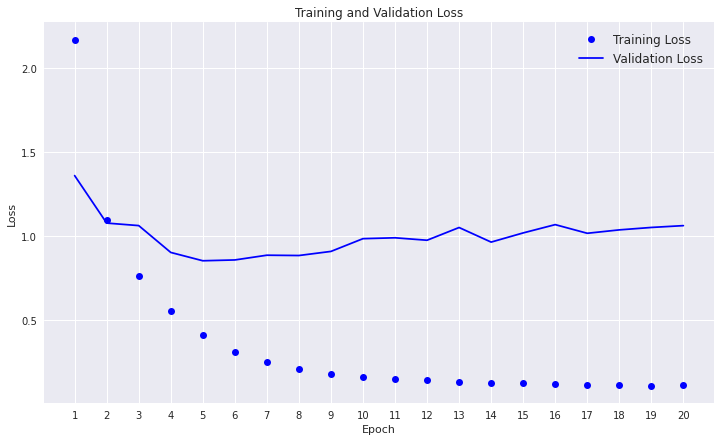

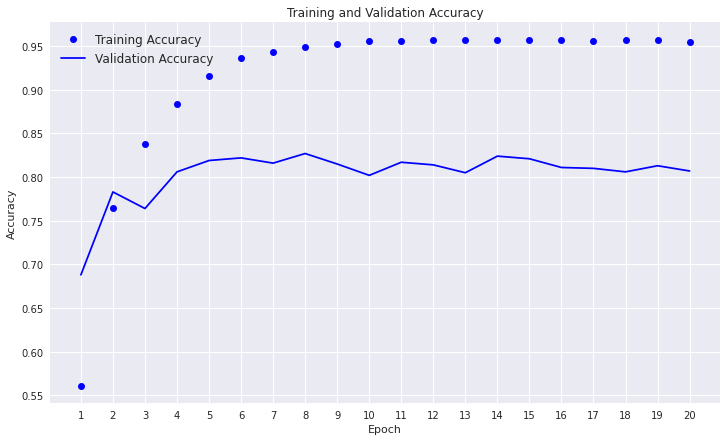

In [ ]:
# 128개 유닛

model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)
print('\n', results)


loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

for i, j, k in zip(['Loss', 'Accuracy'], [loss, acc], [val_loss, val_acc]):
    plt.figure(figsize = (12, 7))
    plt.plot(epochs, j, 'bo', label = f'Training {i}')
    plt.plot(epochs, k, 'b', label = f'Validation {i}')
    plt.title(f'Training and Validation {i}')
    plt.xlabel('Epoch')
    plt.xticks(epochs)
    plt.ylabel(f'{i}')
    plt.legend(fontsize = 12)
    plt.show()

Epoch 1/7
16/16 [==============================] - 1s 20ms/step - loss: 2.2094 - accuracy: 0.4945 - val_loss: 1.5033 - val_accuracy: 0.6300
Epoch 2/7
16/16 [==============================] - 0s 12ms/step - loss: 1.2456 - accuracy: 0.7022 - val_loss: 1.2409 - val_accuracy: 0.7140
Epoch 3/7
16/16 [==============================] - 0s 11ms/step - loss: 0.8994 - accuracy: 0.7860 - val_loss: 1.1099 - val_accuracy: 0.7580
Epoch 4/7
16/16 [==============================] - 0s 12ms/step - loss: 0.6628 - accuracy: 0.8480 - val_loss: 0.9467 - val_accuracy: 0.7970
Epoch 5/7
16/16 [==============================] - 0s 11ms/step - loss: 0.4932 - accuracy: 0.8840 - val_loss: 1.0614 - val_accuracy: 0.7730
Epoch 6/7
16/16 [==============================] - 0s 11ms/step - loss: 0.3991 - accuracy: 0.9099 - val_loss: 0.9134 - val_accuracy: 0.8200
Epoch 7/7
71/71 [==============================] - 0s 2ms/step - loss: 1.0917 - accuracy: 0.7787

 [1.0917060375213623, 0.7787176966667175]


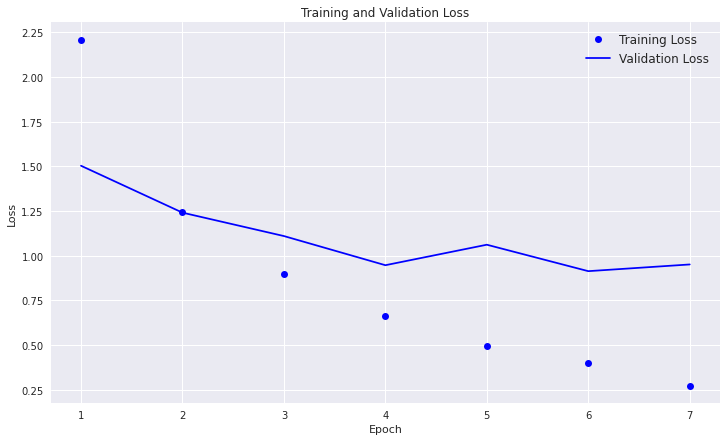

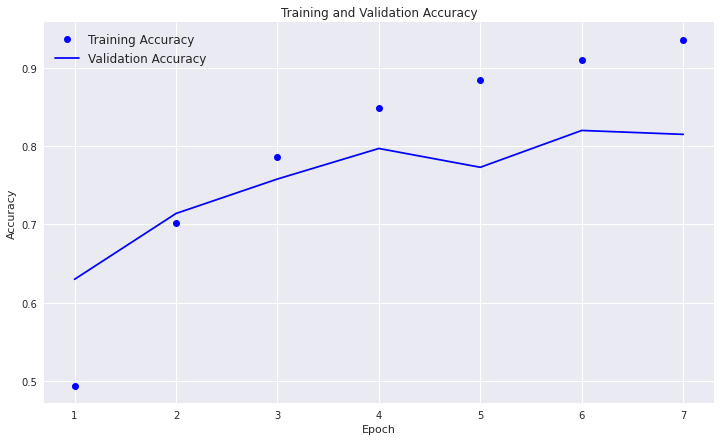

In [ ]:
# 3개의 은닉 층

model = models.Sequential()
model.add(layers.Dense(128, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                    epochs = 7,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)
print('\n', results)


loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

for i, j, k in zip(['Loss', 'Accuracy'], [loss, acc], [val_loss, val_acc]):
    plt.figure(figsize = (12, 7))
    plt.plot(epochs, j, 'bo', label = f'Training {i}')
    plt.plot(epochs, k, 'b', label = f'Validation {i}')
    plt.title(f'Training and Validation {i}')
    plt.xlabel('Epoch')
    plt.xticks(epochs)
    plt.ylabel(f'{i}')
    plt.legend(fontsize = 12)
    plt.show()